# HW 3 - Cancer and Diabeties analisys

## ECGR 5105 - Summer 2024

#### Joshua Ayers

#### SID: 801083470

#### Professor: Vinit Katariya

#### Github: https://github.com/Jayers0/HW3_ECGR5105

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

Problem 1 - Log regression

In [161]:
# Load dataset
diabetes_df = pd.read_csv('Data/diabetes.csv')
X_Diabeties = diabetes_df.drop(columns=["Outcome"])  
y_Daibeties = diabetes_df["Outcome"]
diabetes_df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [162]:

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_Diabeties)

In [163]:


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_Daibeties, test_size=0.2, random_state=42)

In [164]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000, regularization=None, lambda_=0.01):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.regularization = regularization
        self.lambda_ = lambda_
        self.weights = None
        self.bias = None
        self.loss_history = []
        self.accuracy_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            # Compute loss and accuracy
            loss = self._compute_loss(y, y_predicted)
            accuracy = accuracy_score(y, [1 if i > 0.5 else 0 for i in y_predicted])
            self.loss_history.append(loss)
            self.accuracy_history.append(accuracy)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Add regularization term to the gradient
            if self.regularization == 'l2':
                dw += (self.lambda_ / n_samples) * self.weights
            elif self.regularization == 'l1':
                dw += (self.lambda_ / n_samples) * np.sign(self.weights)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _compute_loss(self, y_true, y_pred):
        n_samples = len(y_true)
        if self.regularization == 'l2':
            regularization_term = (self.lambda_ / (2 * n_samples)) * np.sum(self.weights**2)
        elif self.regularization == 'l1':
            regularization_term = (self.lambda_ / n_samples) * np.sum(np.abs(self.weights))
        else:
            regularization_term = 0
        return -1 / n_samples * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) + regularization_term

In [165]:
# Train the logistic regression model
log_reg = LogisticRegression(learning_rate=0.01, n_iters=1000)
log_reg.fit(X_train, y_train)

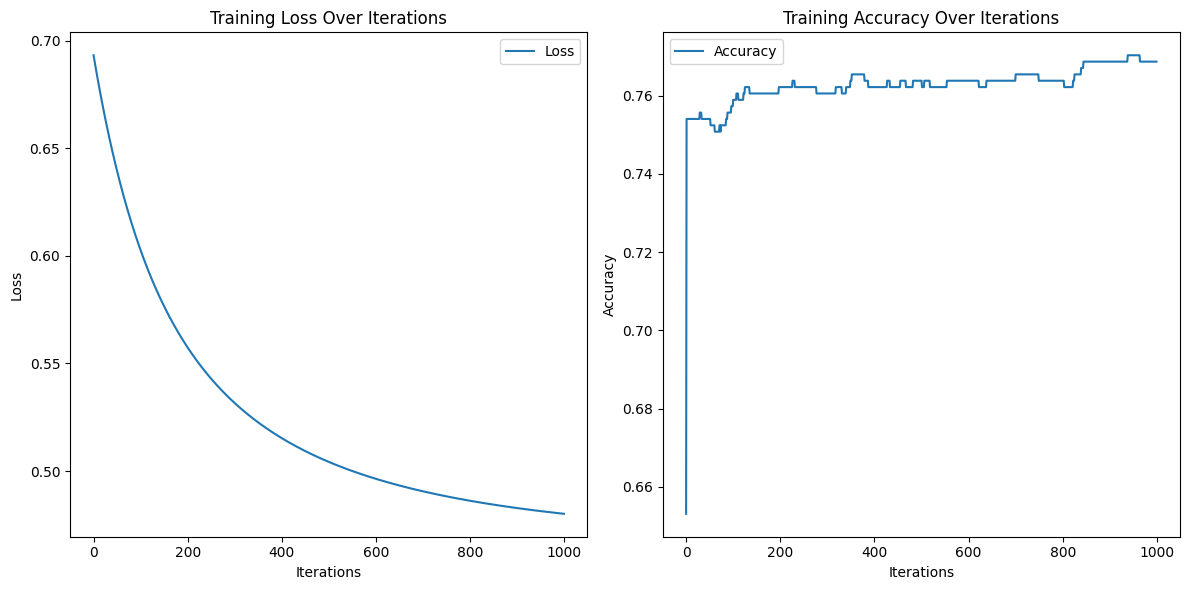

In [166]:
# Plot the training loss and accuracy over iterations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(log_reg.loss_history, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Over Iterations')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(log_reg.accuracy_history, label='Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Iterations')
plt.legend()

plt.tight_layout()
plt.show()



In [167]:
# Predict on the test set
y_pred = log_reg.predict(X_test)

In [168]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.7338
Precision: 0.6250
Recall: 0.6364
F1 Score: 0.6306


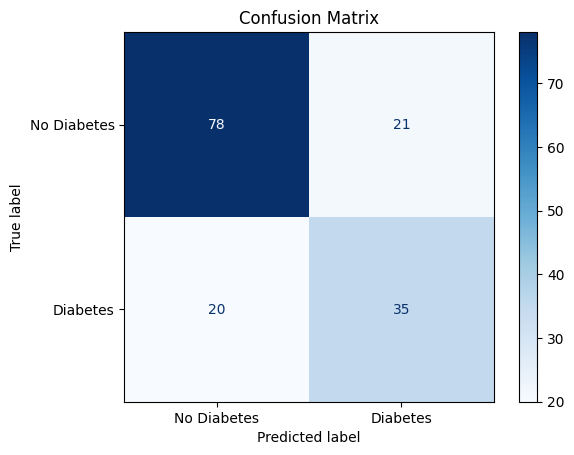

In [169]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Problem 2 - Log vs Reg log

In [170]:
# Load dataset
cancer_df = pd.read_csv('Data/cancer.csv')
#cancer_df = cancer_df.drop("Unnamed: 32")
X_cancer = cancer_df.drop(columns=["diagnosis","id"])  
y_cancer = cancer_df["diagnosis"].apply(lambda x: 1 if x == 'M' else 0)  # using lamda function to change the data into a numeric type as i had training issues withe the 

# Standardize the features
scaler = StandardScaler()
X_scaled_cancer = scaler.fit_transform(X_cancer)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled_cancer, y_cancer, test_size=0.2, random_state=42)



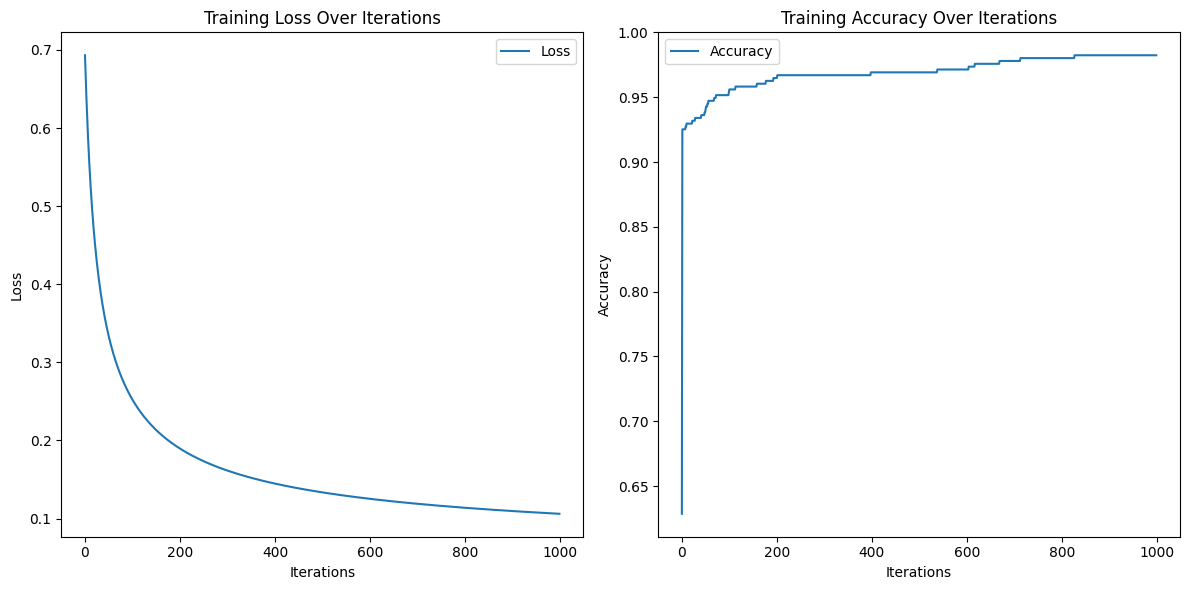

In [171]:
# Train the logistic regression model without regularization
log_reg = LogisticRegression(learning_rate=0.01, n_iters=1000)
log_reg.fit(X_train, y_train)

# Plot the training loss and accuracy over iterations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(log_reg.loss_history, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Over Iterations')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(log_reg.accuracy_history, label='Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Iterations')
plt.legend()

plt.tight_layout()
plt.show()


In [172]:
# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9912
Precision: 1.0000
Recall: 0.9767
F1 Score: 0.9882


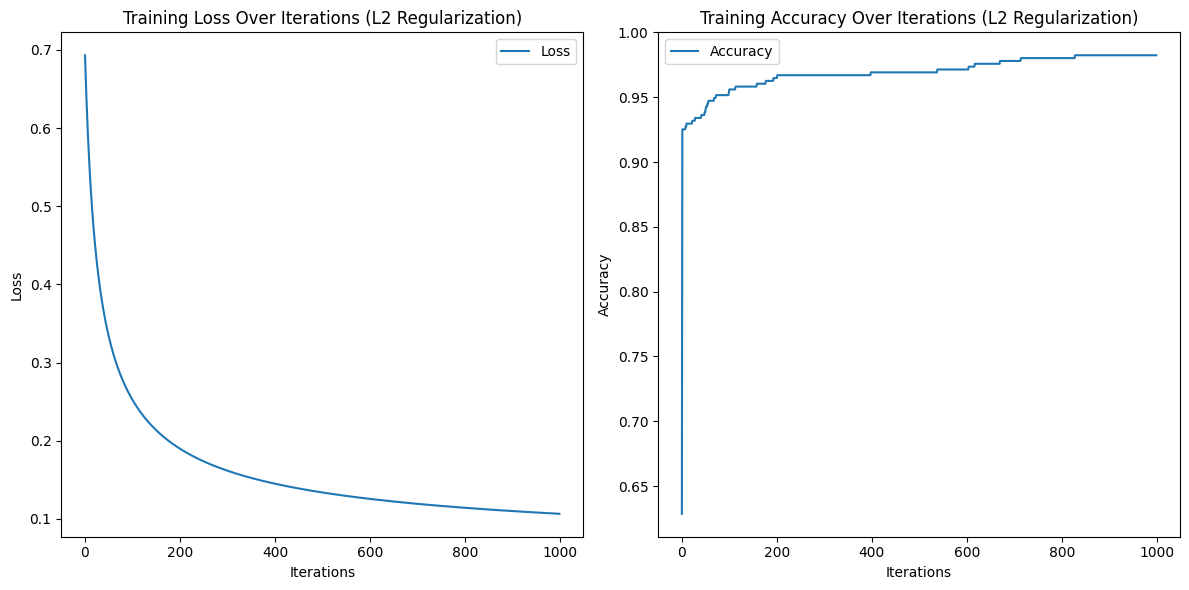

In [173]:
# Train the logistic regression model with L2 regularization
log_reg_l2 = LogisticRegression(learning_rate=0.01, n_iters=1000, regularization='l2', lambda_=0.1)
log_reg_l2.fit(X_train, y_train)

# Plot the training loss and accuracy over iterations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(log_reg_l2.loss_history, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Over Iterations (L2 Regularization)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(log_reg_l2.accuracy_history, label='Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Iterations (L2 Regularization)')
plt.legend()

plt.tight_layout()
plt.show()



In [174]:
# Predict on the test set with L2 regularization
y_pred_l2 = log_reg_l2.predict(X_test)

# Calculate evaluation metrics with L2 regularization
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
precision_l2 = precision_score(y_test, y_pred_l2)
recall_l2 = recall_score(y_test, y_pred_l2)
f1_l2 = f1_score(y_test, y_pred_l2)

print(f'Accuracy (L2): {accuracy_l2:.4f}')
print(f'Precision (L2): {precision_l2:.4f}')
print(f'Recall (L2): {recall_l2:.4f}')
print(f'F1 Score (L2): {f1_l2:.4f}')


Accuracy (L2): 0.9912
Precision (L2): 1.0000
Recall (L2): 0.9767
F1 Score (L2): 0.9882


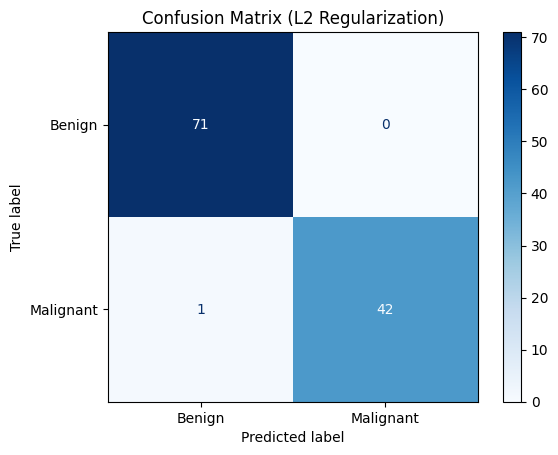

In [175]:
# Plot the confusion matrix with L2 regularization
cm_l2 = confusion_matrix(y_test, y_pred_l2)
disp_l2 = ConfusionMatrixDisplay(confusion_matrix=cm_l2, display_labels=['Benign', 'Malignant'])
disp_l2.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (L2 Regularization)')
plt.show()


### Problem 3 - Naive Baysian
Use the cancer dataset to build a naive Bayesian model to classify the type of cancer (Malignant vs. benign). Use 80% and 20% split between training and evaluation (test). Plot your classification accuracy, precision, recall, and F1 score. Explain and elaborate on your results. Can you compare your results against the logistic regression classifier you did in Problem 2.



Defining a Naive baysan classifier

In [176]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        
        # Initialize mean, var, and priors
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)
        
        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)
    
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator
    
    def _predict(self, x):
        posteriors = []
        
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
        
        return self._classes[np.argmax(posteriors)]
    
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

Initializing the model and training it on the training and test data defined in the previous problem

In [177]:
# Initialize the model
nb = NaiveBayes()

# Train the model
nb.fit(X_train, y_train)


Performing a prediction using the model and calculating the precision and recall.

In [178]:
# Predict on the test set
y_pred = nb.predict(X_test)

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    precision = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_pred == 1)
    recall = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_true == 1)
    f1 = 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = calculate_metrics(y_test.values, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1 Score: 0.9523809523809524


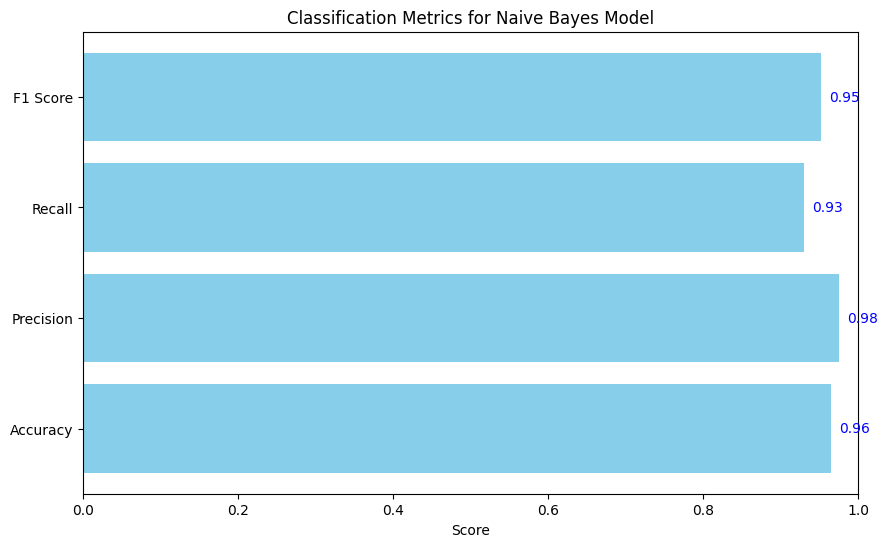

In [179]:
# Data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(metrics, values, color='skyblue')
plt.xlabel('Score')
plt.title('Classification Metrics for Naive Bayes Model')
plt.xlim(0, 1)

# Add scores to bars
for i, v in enumerate(values):
    plt.text(v + 0.01, i, f'{v:.2f}', color='blue', va='center')

plt.show()


### Problem 4 - PCA
Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest classification accuracy. Plot your classification accuracy, precision, recall, and F1 score over a different number of Ks. Explain and elaborate on your results and compare it against problems 2 and 3.

In [180]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # Covariance matrix
        cov = np.cov(X.T)

        # Eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # Sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # Store first n eigenvectors
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)
    
    def calculate_metrics(y_true, y_pred):
        accuracy = np.mean(y_true == y_pred)
        precision = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_true == 1)
        f1 = 2 * (precision * recall) / (precision + recall)
        return accuracy, precision, recall, f1

In [181]:
# Train and evaluate the model with different numbers of principal components
results = []

for k in range(1, X_train.shape[1] + 1):
    pca = PCA(n_components=k)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    log_reg = LogisticRegression(learning_rate=0.01, n_iters=1000)
    log_reg.fit(X_train_pca, y_train)
    y_pred = log_reg.predict(X_test_pca)

    accuracy, precision, recall, f1 = calculate_metrics(y_test.values, y_pred)
    results.append((k, accuracy, precision, recall, f1))

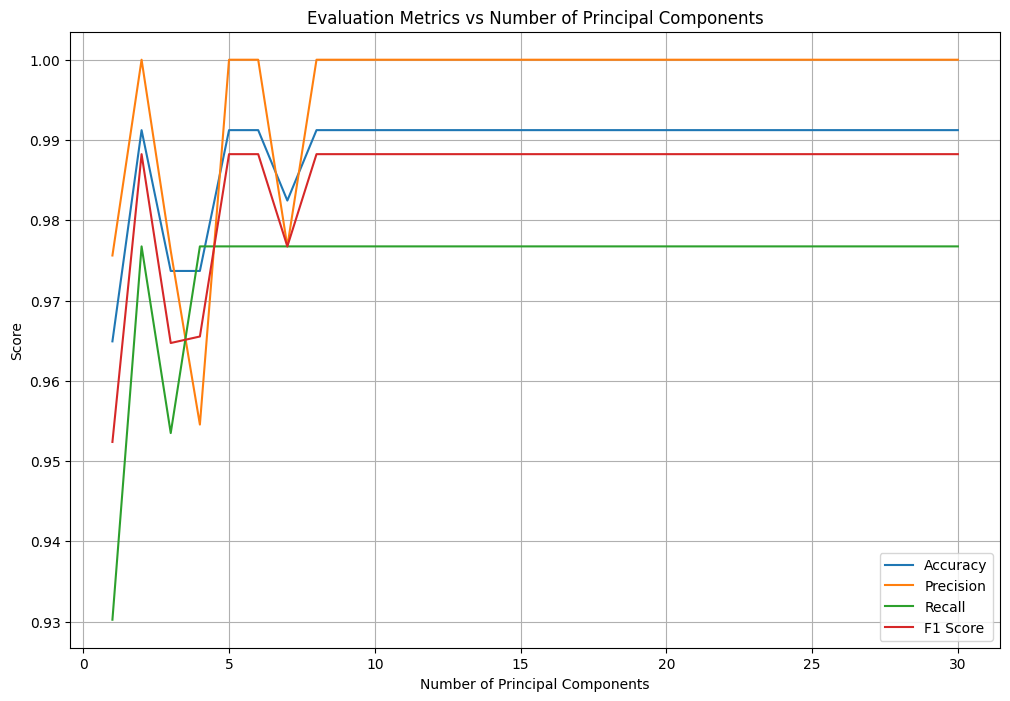

In [182]:

results = np.array(results)
ks = results[:, 0]
accuracies = results[:, 1]
precisions = results[:, 2]
recalls = results[:, 3]
f1s = results[:, 4]

plt.figure(figsize=(12, 8))
plt.plot(ks, accuracies, label='Accuracy')
plt.plot(ks, precisions, label='Precision')
plt.plot(ks, recalls, label='Recall')
plt.plot(ks, f1s, label='F1 Score')
plt.xlabel('Number of Principal Components')
plt.ylabel('Score')
plt.title('Evaluation Metrics vs Number of Principal Components')
plt.legend()
plt.grid(True)
plt.show()

Problem 5:

Accuracy: 0.9912
Precision: 1.0000
Recall: 0.9767
F1 Score: 0.9882


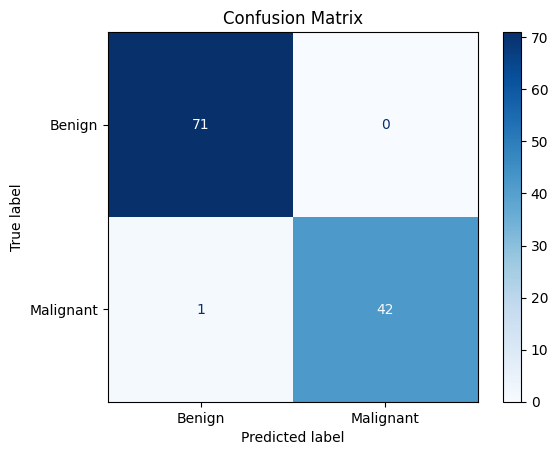

In [187]:
# Train the logistic regression model
log_reg_p5 = LogisticRegression(learning_rate=0.01, n_iters=1000)
log_reg_p5.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg_p5.predict(X_test)

# Predict on the test set
y_pred = log_reg_p5.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Benign', 'Malignant'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()